#  NLP Projects  -  Sentiment Analysis

## What is NLP 

Natural Language Processing (NLP) is the field of Artificial Intelligence concerned with the processing and understanding of human language. Since its inception during the 1950s, machine understanding of language has played a pivotal role in translation, topic modeling, document indexing, information retrieval, and extraction.

### Data Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('IMDB-Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.shape

(50000, 2)

In [4]:
df.columns

Index(['review', 'sentiment'], dtype='object')

### Preprocessing

In [5]:
# Define a set of stopwords
stopwords = set(["a", "an", "and", "are", "as", "at", "be", "by", "for", "from", "has", "he", "in", "is", "it", "its", "of", "on", "that", "the", "to", "was", "were", "will", "with"])

def remove_stopwords(text):
    return ' '.join(word for word in text.split() if word.lower() not in stopwords)

df['review_without_stopwords'] = df['review'].apply(remove_stopwords)


In [6]:
# Calculate word counts
df['word_counts'] = df['review'].apply(lambda x: len(x.split()))

# Calculate character counts
df['char_counts'] = df['review'].apply(lambda x: len(x))

# Calculate average word length
df['avg_wordlength'] = df['review'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

# Calculate stopwords counts (assuming stopwords are defined somewhere)
stopwords = set(["a", "an", "and", "are", "as", "at", "be", "by", "for", "from", "has", "he", "in", "is", "it", "its", "of", "on", "that", "the", "to", "was", "were", "will", "with"])  # Define your set of stopwords
df['stopwords_counts'] = df['review'].apply(lambda x: len([word for word in x.split() if word.lower() in stopwords]))

# Remove HTML tags
import re
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

df['review'] = df['review'].apply(remove_html_tags)

# Convert text to lowercase
df['review'] = df['review'].str.lower()


In [7]:
df.head()

,review,sentiment,review_without_stopwords,word_counts,char_counts,avg_wordlength,stopwords_counts
0,one of the other reviewers has mentioned that ...,positive,One other reviewers mentioned after watching j...,307,1761,4.739414,85
1,a wonderful little production. the filming tec...,positive,wonderful little production. <br /><br />The f...,162,998,5.166667,46
2,i thought this was a wonderful way to spend ti...,positive,I thought this wonderful way spend time too ho...,166,926,4.584337,48
3,basically there's a family where a little boy ...,negative,Basically there's family where little boy (Jak...,138,748,4.427536,39
4,"petter mattei's ""love in the time of money"" is...",positive,"Petter Mattei's ""Love Time Money"" visually stu...",230,1317,4.730435,63


In [8]:
import seaborn as sns

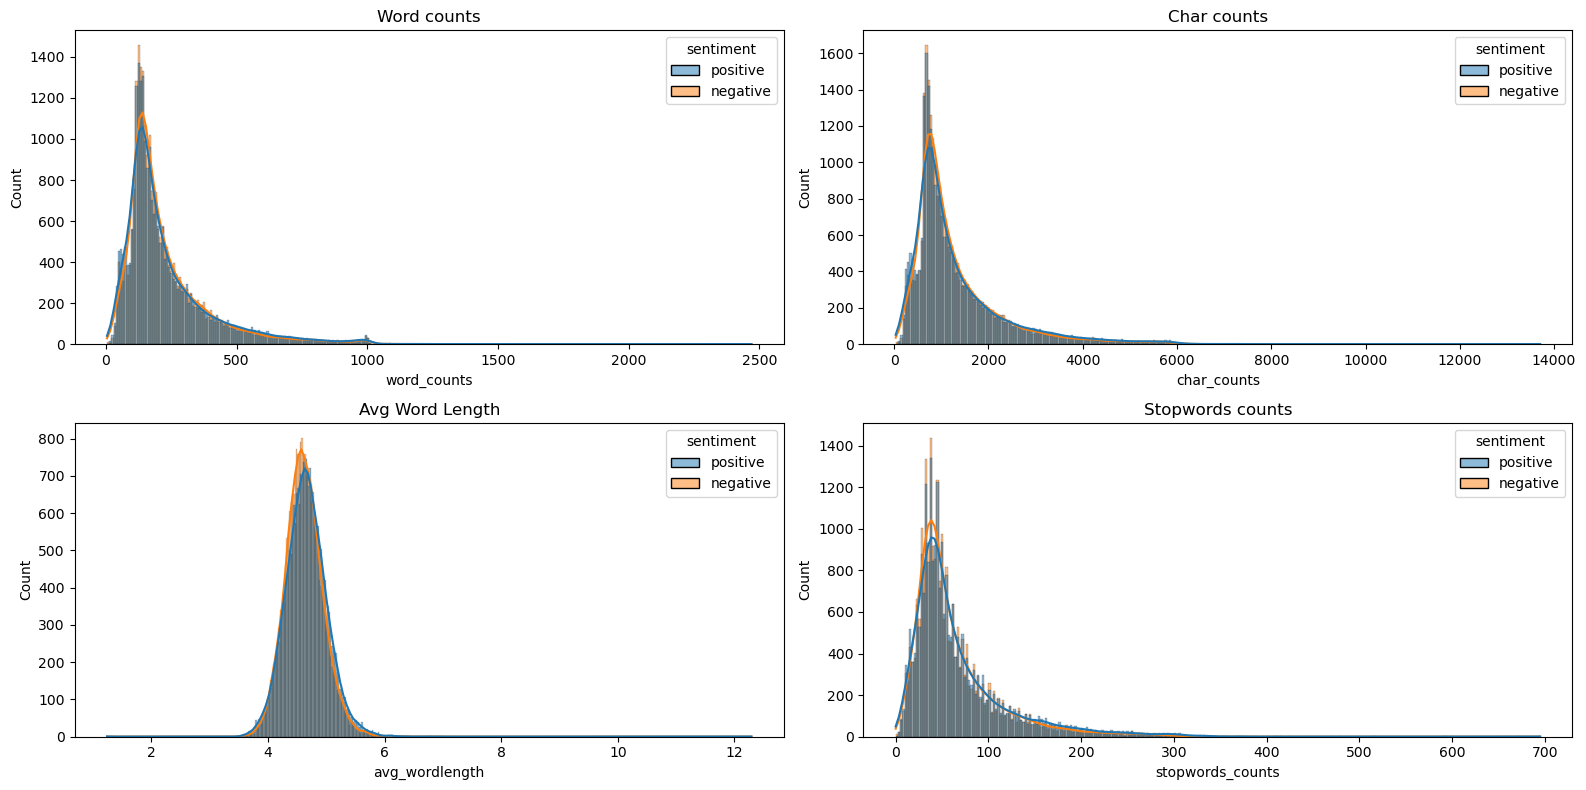

In [9]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
# sns.barplot(x='sentiment', y='word_counts', data=df)
sns.histplot(data=df, x='word_counts', hue='sentiment', kde=True)
plt.title('Word counts')

plt.subplot(2,2,2)
sns.histplot(data=df, x='char_counts', hue='sentiment', kde=True)
plt.title('Char counts')

plt.subplot(2,2,3)
sns.histplot(data=df, x='avg_wordlength', hue='sentiment', kde=True)
plt.title('Avg Word Length')

plt.subplot(2,2,4)
sns.histplot(data=df, x='stopwords_counts', hue='sentiment', kde=True)
plt.title('Stopwords counts')

plt.tight_layout()
plt.show()


# Model Building

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['review'],df['sentiment'],test_size=0.2,random_state=0,stratify=df['sentiment'])

In [16]:
X_train.shape, X_test.shape

((40000,), (10000,))

In [20]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8997
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      5000
    positive       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

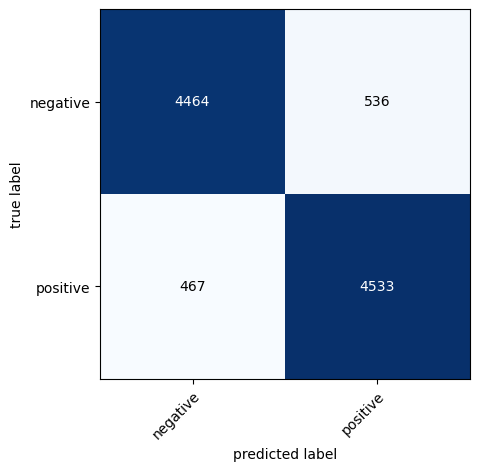

In [18]:
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=clf.classes_)

# Prediction

In [25]:
# Define the review
review = ['bad movie']

# Use the trained model to predict the sentiment
prediction = clf.predict(review)

# Print the predicted sentiment
print("Predicted Sentiment:", prediction[0])


Predicted Sentiment: negative


In [26]:
import pickle

pickle.dump(clf, open('sentiment_analysis.pkl', 'wb'))